<a href="https://colab.research.google.com/github/kkobug222/python/blob/main/van_monet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(3)
random.seed(3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/westpic"


train_van_dir = path + '/van'
train_monet_dir = path + '/monet'



train_van_names=os.listdir(train_van_dir)
print(train_van_names[:10])


train_monet_names=os.listdir(train_monet_dir)
print(train_monet_names[:10])


print ('total training van images:', len(os.listdir(train_van_dir)))
print ('total training monet images:', len(os.listdir(train_monet_dir)))


['train_van_dir1.jpg', 'train_van_dir2.jpg', 'train_van_dir3.jpg', 'train_van_dir4.jpg', 'train_van_dir5.jpg', 'train_van_dir6.jpg', 'train_van_dir7.jpg', 'train_van_dir8.jpg', 'train_van_dir9.jpg', 'train_van_dir10.jpg']
['train_monet_dir1.jpg', 'train_monet_dir2.jpg', 'train_monet_dir3.jpg', 'train_monet_dir4.jpg', 'train_monet_dir5.jpg', 'train_monet_dir6.jpg', 'train_monet_dir7.jpg', 'train_monet_dir8.jpg', 'train_monet_dir9.jpg', 'train_monet_dir10.jpg']
total training van images: 26
total training monet images: 26


In [ ]:
train_van = glob.glob(path + '/van' + '/*')
train_monet = glob.glob(path + '/monet' + '/*')

In [ ]:
import cv2
from matplotlib import pyplot as plt

def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

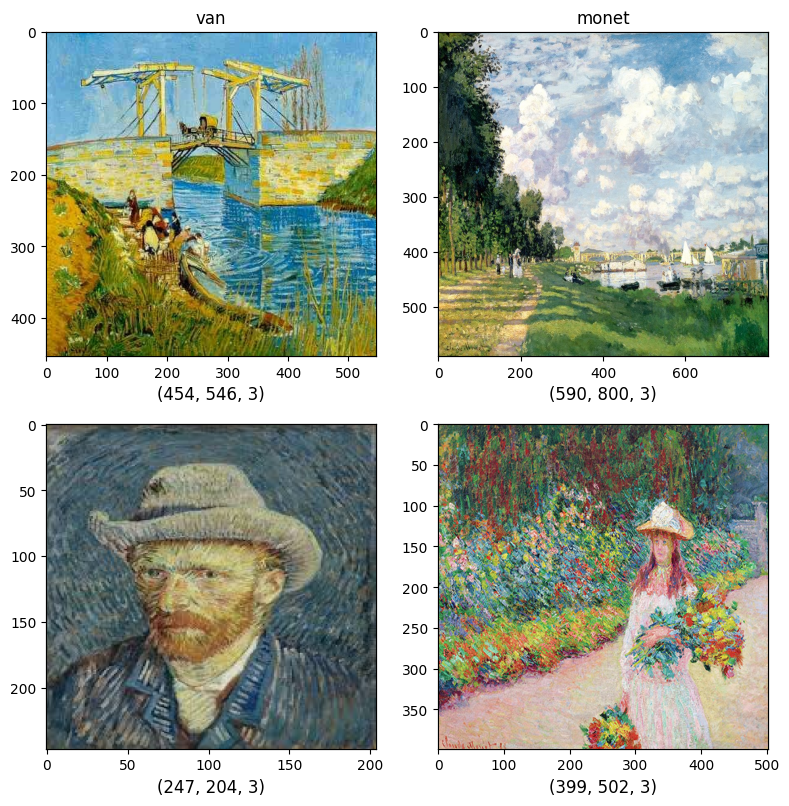

In [ ]:
import random
img_arr = []
img_num =  range(0,26)

for i in random.sample(img_num, 2):
    img_arr.append(read_img(train_van[i]))
    img_arr.append(read_img(train_monet[i]))

rows = 2
colums = 2

fig, axes = plt.subplots(nrows = rows, ncols = colums, figsize = (colums*4,rows*4))

for num in range(1,rows*colums+1):
    fig.add_subplot(rows, colums, num)
    idx = num -1
    plt.imshow(img_arr[idx], aspect = 'auto')
    plt.xlabel(f'{img_arr[idx].shape}', fontsize = 12)

fig.tight_layout()

cols = ['van','monet']


for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

for ida, ax in enumerate(axes.flatten()):
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [ ]:
from PIL import Image

for i in train_monet_names :
  img = Image.open(train_monet_dir + '/' + i )

  img_resize = img.resize((300,300))
  img_resize.save('/content/drive/MyDrive/westpic/re_monet/'+i)

In [ ]:
for k in train_van_names :
  img = Image.open(train_van_dir + '/' + k )

  img_resize = img.resize((300,300))
  img_resize.save('/content/drive/MyDrive/westpic/re_van/'+ k)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)

model = tf.keras.models.Sequential([
    #1
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #2
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #3
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten
    tf.keras.layers.Flatten(),
    #512
    tf.keras.layers.Dense(512,activation='relu'),
    #1
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    40,141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(300, 300),
        batch_size=7,
        class_mode='binary',
        seed = 3)

Found 104 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch=8,epochs=20,verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3052 - loss: -1323.9862
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1693 - loss: -51855.7773
Epoch 3/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2714 - loss: -152339.9375
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2338 - loss: -473828.8438
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.2493 - loss: -1721172.1250
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2591 - loss: -3507207.2500
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.1924 - loss: -5430003.0000
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2017 - loss: -8148265.5000
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1627 - loss: -20798036.0000
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1172 - loss: -18756844.0000
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2130 - loss: -34041876.0000
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2250 - loss: -45209548.0000
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2040 - loss: -53982316.0000
Epoch 14/20
8/8 ━━━━━━━━━━

테스트


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import files
upload = files.upload()

Saving 별이 빛나는 밤.jpg to 별이 빛나는 밤 (2).jpg


In [ ]:
img1=Image.open('/content/drive/MyDrive/westpic/별이 빛나는 밤.jpg')

img_resize1 = img1.resize((300,300))
img_resize1

test_img1 = image.img_to_array(img_resize1)
images1 = np.vstack([test_img1])

images1

array([[[ 42.,  44.,  68.],
        [ 36.,  35.,  75.],
        [ 31.,  31.,  69.],
        ...,
        [191., 170., 130.],
        [176., 162., 127.],
        [177., 160., 128.]],

       [[ 33.,  34.,  62.],
        [ 32.,  31.,  71.],
        [ 25.,  25.,  58.],
        ...,
        [189., 172., 137.],
        [184., 168., 134.],
        [186., 167., 135.]],

       [[ 32.,  33.,  63.],
        [ 28.,  27.,  65.],
        [ 21.,  23.,  49.],
        ...,
        [177., 161., 134.],
        [197., 177., 145.],
        [190., 169., 138.]],

       ...,

       [[ 82.,  69.,  45.],
        [ 46.,  46.,  31.],
        [ 46.,  48.,  40.],
        ...,
        [ 96.,  97.,  90.],
        [104., 103.,  96.],
        [107.,  99.,  74.]],

       [[126., 109.,  79.],
        [112., 109.,  81.],
        [ 78.,  76.,  56.],
        ...,
        [ 73.,  67.,  56.],
        [ 83.,  77.,  59.],
        [125., 115.,  85.]],

       [[148., 132.,  90.],
        [137., 130.,  88.],
        [148., 1

In [ ]:
classes = model.predict(np.expand_dims(images1, axis=0), batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("monet")
else:
    print("van")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[1.]
monet


정확도 개선, 테스트 파일 저장하기 보고서 작성
